# Module 4 - Linear Model Diagnosis and Validation

## 4B:  Resampling Techniques and Model Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Model Diagnosis Example

### Create 5 polynomial models for predicting MPG from horsepower

In [2]:
cars = pd.read_csv('Cars Data.csv')
cars = cars.loc[cars['Type'] != "Hybrid"]
cars = cars.reset_index(drop = True)  #  Re-index form 0 to 424.  Needed to avoid issues with subsequent methods
cars

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN)
0,Acura,3.5 RL 4dr,Front,Asia,Sedan,6.0,3.5,225,"$39,014",197,18,24,"$43,755",3880,115
1,Acura,3.5 RL w/Navigation 4dr,Front,Asia,Sedan,6.0,3.5,225,"$41,100",197,18,24,"$46,100",3893,115
2,Acura,MDX,All,Asia,SUV,6.0,3.5,265,"$33,337",189,17,23,"$36,945",4451,106
3,Acura,NSX coupe 2dr manual S,Rear,Asia,Sports,6.0,3.2,290,"$79,978",174,17,24,"$89,765",3153,100
4,Acura,RSX Type S 2dr,Front,Asia,Sedan,4.0,2.0,200,"$21,761",172,24,31,"$23,820",2778,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Volvo,S80 2.9 4dr,Front,Europe,Sedan,6.0,2.9,208,"$35,542",190,20,28,"$37,730",3576,110
421,Volvo,S80 T6 4dr,Front,Europe,Sedan,6.0,2.9,268,"$42,573",190,19,26,"$45,210",3653,110
422,Volvo,V40,Front,Europe,Wagon,4.0,1.9,170,"$24,641",180,22,29,"$26,135",2822,101
423,Volvo,XC70,All,Europe,Wagon,5.0,2.5,208,"$33,112",186,20,27,"$35,145",3823,109


In [3]:
y = cars[['MPG (City)']]
X = cars[['Horsepower']]
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
X = poly.fit_transform(X)
X = pd.DataFrame(X, columns = ["X^0", "X", "X^2", "X^3", "X^4", "X^5"])

In [4]:
X

,X^0,X,X^2,X^3,X^4,X^5
0,1.0,225.0,50625.0,11390625.0,2.562891e+09,5.766504e+11
1,1.0,225.0,50625.0,11390625.0,2.562891e+09,5.766504e+11
2,1.0,265.0,70225.0,18609625.0,4.931551e+09,1.306861e+12
3,1.0,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12
4,1.0,200.0,40000.0,8000000.0,1.600000e+09,3.200000e+11
...,...,...,...,...,...,...
420,1.0,208.0,43264.0,8998912.0,1.871774e+09,3.893289e+11
421,1.0,268.0,71824.0,19248832.0,5.158687e+09,1.382528e+12
422,1.0,170.0,28900.0,4913000.0,8.352100e+08,1.419857e+11
423,1.0,208.0,43264.0,8998912.0,1.871774e+09,3.893289e+11


#### Create 5 models using entire dataset for training

In [5]:
poly_model = LinearRegression(fit_intercept = True)
pred_matrix = X[['X']]
y_hat = poly_model.fit(pred_matrix, y).predict(X[['X']])
metrics.r2_score(y, y_hat)

0.5362829401248901

In [6]:
pred_matrix = X[['X', 'X^2']]
y_hat = poly_model.fit(pred_matrix, y).predict(pred_matrix)
metrics.r2_score(y, y_hat)

0.6621944231230866

In [7]:
pred_matrix = X[['X', 'X^2', 'X^3']]
y_hat = poly_model.fit(pred_matrix, y).predict(pred_matrix)
metrics.r2_score(y, y_hat)

0.7094281565698564

In [8]:
pred_matrix = X[['X', 'X^2', 'X^3', 'X^4']]
y_hat = poly_model.fit(pred_matrix, y).predict(pred_matrix)
metrics.r2_score(y, y_hat)

0.7144759855213365

In [9]:
pred_matrix = X[['X', 'X^2', 'X^3', 'X^4', 'X^5']]
y_hat = poly_model.fit(pred_matrix, y).predict(pred_matrix)
metrics.r2_score(y, y_hat)

0.7154509301029706

Look at p-values of coefficients

In [10]:
import statsmodels.api as sm
sm.OLS(y,sm.add_constant(X[['X', 'X^2', 'X^3', 'X^4', 'X^5']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MPG (City)   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          6.18e-112
Time:                        11:47:11   Log-Likelihood:                -957.18
No. Observations:                 425   AIC:                             1926.
Df Residuals:                     419   BIC:                             1951.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.4450     14.765      5.922      0.000      58.422     116.468
X             -0.9859      0.322     -3.063      0.002      -1.619      -0.353
X^2            0.0058      0.003      2.183      0.030       0.001       0.011
X^3        -1.753e-05   1.03e-05     -1.694      0.091   -3.79e-05    2.81e-06
X^4         2.673e-08   1.92e-08      1.392      0.165    -1.1e-08    6.45e-08
X^5        -1.626e-11   1.36e-11     -1.198      0.232   -4.29e-11    1.04e-11
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.160
Skew:                          -0.047   Prob(JB):                        0.560
Kurtosis:                       3.238   Cond. No.                     4.84e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Split into test and training partitions and re-run five models

In [11]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.5, random_state = 0)

In [12]:
X_train

,X^0,X,X^2,X^3,X^4,X^5
229,1.0,232.0,53824.0,12487168.0,2.897023e+09,6.721093e+11
159,1.0,160.0,25600.0,4096000.0,6.553600e+08,1.048576e+11
54,1.0,185.0,34225.0,6331625.0,1.171351e+09,2.166999e+11
208,1.0,195.0,38025.0,7414875.0,1.445901e+09,2.819506e+11
10,1.0,220.0,48400.0,10648000.0,2.342560e+09,5.153632e+11
...,...,...,...,...,...,...
309,1.0,126.0,15876.0,2000376.0,2.520474e+08,3.175797e+10
357,1.0,165.0,27225.0,4492125.0,7.412006e+08,1.222981e+11
51,1.0,275.0,75625.0,20796875.0,5.719141e+09,1.572764e+12
351,1.0,108.0,11664.0,1259712.0,1.360489e+08,1.469328e+10


In [13]:
X_test

,X^0,X,X^2,X^3,X^4,X^5
415,1.0,170.0,28900.0,4913000.0,8.352100e+08,1.419857e+11
27,1.0,184.0,33856.0,6229504.0,1.146229e+09,2.109061e+11
2,1.0,265.0,70225.0,18609625.0,4.931551e+09,1.306861e+12
246,1.0,130.0,16900.0,2197000.0,2.856100e+08,3.712930e+10
156,1.0,115.0,13225.0,1520875.0,1.749006e+08,2.011357e+10
...,...,...,...,...,...,...
323,1.0,185.0,34225.0,6331625.0,1.171351e+09,2.166999e+11
192,1.0,227.0,51529.0,11697083.0,2.655238e+09,6.027390e+11
117,1.0,500.0,250000.0,125000000.0,6.250000e+10,3.125000e+13
47,1.0,205.0,42025.0,8615125.0,1.766101e+09,3.620506e+11


In [14]:
pred_matrix = X_train[['X']]
test_matrix = X_test[['X']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.4068627576569702

In [15]:
pred_matrix = X_train[['X', 'X^2']]
test_matrix = X_test[['X', 'X^2']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.4795604189719457

In [16]:
pred_matrix = X_train[['X', 'X^2', 'X^3']]
test_matrix = X_test[['X', 'X^2', 'X^3']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.6649984068923545

In [17]:
pred_matrix = X_train[['X', 'X^2', 'X^3', 'X^4']]
test_matrix = X_test[['X', 'X^2', 'X^3', 'X^4']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.6366875686528273

In [18]:
pred_matrix = X_train[['X', 'X^2', 'X^3', 'X^4', 'X^5']]
test_matrix = X_test[['X', 'X^2', 'X^3', 'X^4', 'X^5']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.5263560291779714

Re-run with different random split

In [19]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.5, random_state = 6)

In [20]:
pred_matrix = X_train[['X']]
test_matrix = X_test[['X']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.4951389161003863

In [21]:
pred_matrix = X_train[['X', 'X^2']]
test_matrix = X_test[['X', 'X^2']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.6379429900911943

In [22]:
pred_matrix = X_train[['X', 'X^2', 'X^3']]
test_matrix = X_test[['X', 'X^2', 'X^3']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.6994495949363551

In [23]:
pred_matrix = X_train[['X', 'X^2', 'X^3', 'X^4']]
test_matrix = X_test[['X', 'X^2', 'X^3', 'X^4']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.7011043471799752

In [24]:
pred_matrix = X_train[['X', 'X^2', 'X^3', 'X^4', 'X^5']]
test_matrix = X_test[['X', 'X^2', 'X^3', 'X^4', 'X^5']]
y_hat_test = poly_model.fit(pred_matrix, y_train).predict(test_matrix)
metrics.r2_score(y_test, y_hat_test)

0.6822965378117414

## Estimating Model Variance

### Example - Sample Mean

Draw a sample of 100 variable from a population that has a mean of 3 and a standard deviation of 2

In [43]:
mu, sigma = 3,2
x = np.random.default_rng().normal(mu, sigma, 100)
x

array([ 5.18409939,  5.76368898,  1.35217265,  2.92063989,  2.4235822 ,
        7.45231779,  2.05495018,  3.39937962,  0.13967855,  1.5022895 ,
        2.33965294,  9.19764897,  4.7598329 ,  3.72950043,  4.80084213,
        6.57245689,  2.4132318 ,  1.37368621,  1.74395376,  1.27233427,
        5.14124863,  3.83549941,  1.4722592 ,  3.58004208,  1.7357605 ,
        4.09507589,  2.00392709,  4.35701044,  8.30317706,  5.28624396,
        0.53479836,  1.79812943,  3.58628024, -2.37054234,  0.67746569,
        1.49414198,  4.28032776,  0.18542601,  1.43231685,  1.13455726,
        3.41614829,  3.93593797, -1.46460942,  1.74895655,  4.70888616,
        3.12513332,  6.08000809,  0.7557608 ,  2.57242937,  6.62750111,
        0.55160742,  7.31595843,  4.64635463,  2.56052786,  1.48475873,
        0.86551757,  4.47913531,  5.21515368,  0.1705427 ,  2.26631961,
        1.2146326 ,  5.66809893, -0.84794435,  3.87741107,  0.72488669,
        1.81050879,  4.0327265 ,  4.2748799 ,  1.57089395,  0.85

<AxesSubplot:ylabel='Count'>

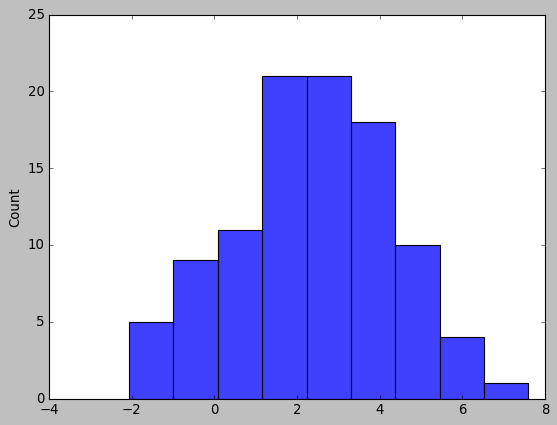

In [35]:
sns.histplot(x)

Calculate sample mean and standard error:

In [44]:
x_bar = np.mean(x)
x_bar

2.9885909695335737

In [48]:
se_x = np.std(x)
se_x/np.sqrt(len(x))

0.22580135250674965

In [49]:
from scipy.stats import sem
sem(x)

0.22693889800595887

Calculate standard error using bootstrapping

In [51]:
sample_means = np.zeros(1000)
for i in range(1000):
    sample_means[i] = np.mean(np.random.choice(x, size = np.size(x), replace=True))
np.std(sample_means)

0.22659101826003697

(array([  8.,  22., 102., 149., 247., 204., 151.,  84.,  24.,   9.]),
 array([2.32500665, 2.4598679 , 2.59472915, 2.7295904 , 2.86445165,
        2.9993129 , 3.13417414, 3.26903539, 3.40389664, 3.53875789,
        3.67361914]),
 <BarContainer object of 10 artists>)

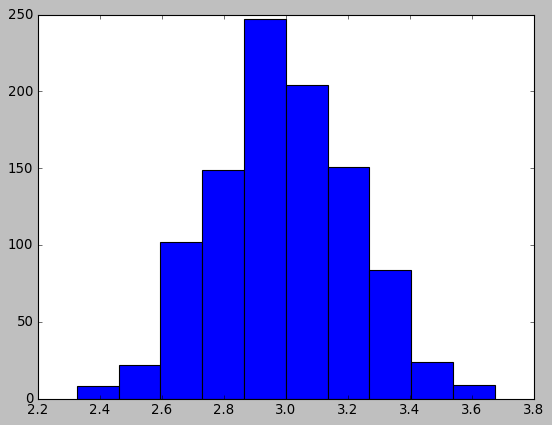

In [52]:
plt.hist(sample_means)

In [53]:
np.sort(sample_means)[24]  # Lower bound of 95% CI

2.5706889106188644

In [54]:
np.sort(sample_means)[974]  # Upper bound of 95% CI

3.428397917049703